# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
   
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}) 

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | awjilah
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | dawson creek
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | kristiansund
Processing Record 13 of Set 1 | cozumel
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | tarinkot
Processing Record 16 of Set 1 | langsa
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | yigo village
Processing Record 21 of Set 1 | acarau
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | waitangi


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,17.52,96,100,7.45,ZA,1712582398
1,bethel,41.3712,-73.4140,11.34,51,0,0.45,US,1712582218
2,mejit,10.2753,170.8646,26.85,85,99,10.40,MH,1712582398
3,hithadhoo,-0.6000,73.0833,29.87,66,91,1.45,MV,1712582399
4,invercargill,-46.4000,168.3500,13.34,78,63,1.79,NZ,1712582399


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.52,96,100,7.45,ZA,1712582398
1,bethel,41.3712,-73.4140,11.34,51,0,0.45,US,1712582218
2,mejit,10.2753,170.8646,26.85,85,99,10.40,MH,1712582398
3,hithadhoo,-0.6000,73.0833,29.87,66,91,1.45,MV,1712582399
4,invercargill,-46.4000,168.3500,13.34,78,63,1.79,NZ,1712582399


In [17]:
from datetime import datetime

# Unix timestamp
timestamp = 1712582398

# Convert Unix timestamp to datetime object
datetime_object = datetime.utcfromtimestamp(timestamp)

# Print the datetime object
print(datetime_object)


2024-04-08 13:19:58


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

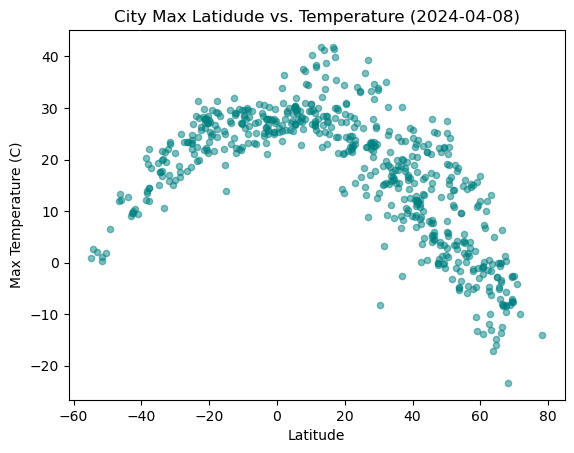

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", c="teal", xlabel="Latitude",
                  ylabel="Max Temperature (C)", title="City Max Latidude vs. Temperature (" + str(datetime.today().date()) + ")",
                  alpha =0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

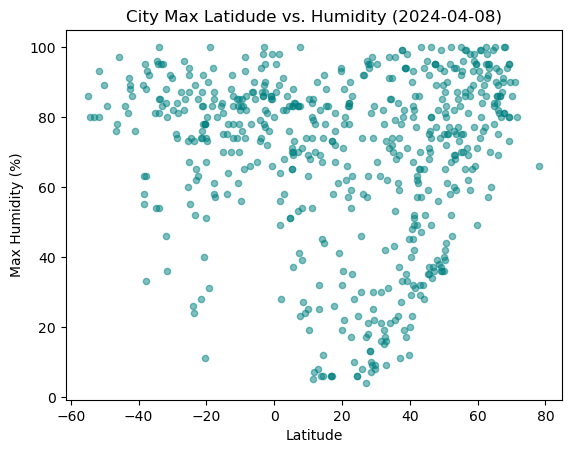

In [24]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", c="teal", xlabel="Latitude",
                  ylabel="Max Humidity (%)", title="City Max Latidude vs. Humidity (" + str(datetime.today().date()) + ")",
                  alpha =0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

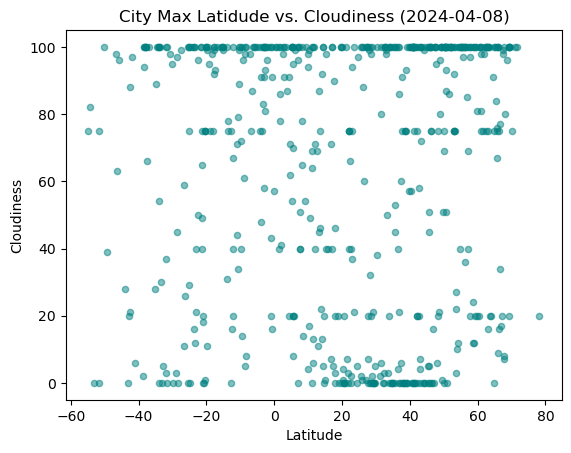

In [25]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", c="teal", xlabel="Latitude",
                  ylabel="Cloudiness", title="City Max Latidude vs. Cloudiness (" + str(datetime.today().date()) + ")",
                  alpha =0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

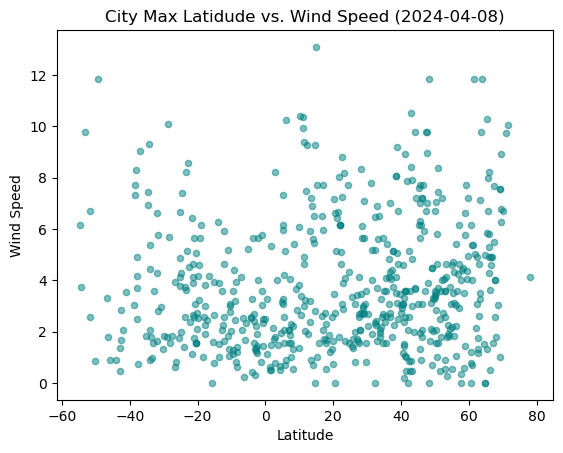

In [26]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", c="teal", xlabel="Latitude",
                  ylabel="Wind Speed", title="City Max Latidude vs. Wind Speed (" + str(datetime.today().date()) + ")",
                  alpha =0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values):
    return linregress(x_values, y_values)


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,11.34,51,0,0.45,US,1712582218
2,mejit,10.2753,170.8646,26.85,85,99,10.40,MH,1712582398
5,iqaluit,63.7506,-68.5145,-17.15,70,20,9.77,CA,1712582399
6,awjilah,29.1081,21.2869,26.58,25,0,7.11,LY,1712582400
7,albany,42.6001,-73.9662,8.77,65,58,0.45,US,1712582383


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,17.52,96,100,7.45,ZA,1712582398
3,hithadhoo,-0.6000,73.0833,29.87,66,91,1.45,MV,1712582399
4,invercargill,-46.4000,168.3500,13.34,78,63,1.79,NZ,1712582399
16,pisco,-13.7000,-76.2167,23.03,78,75,1.03,PE,1712582403
20,acarau,-2.8856,-40.1200,27.93,78,58,1.26,BR,1712582405


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6929685210429639 , R value: -0.8324473082681954


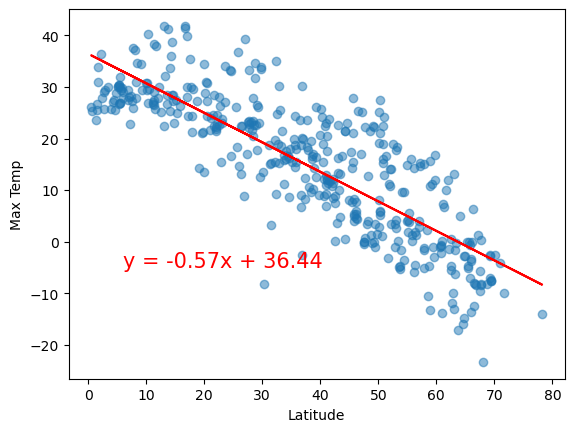

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()


R squared: 0.6593007914065752 , R value: 0.811973393287351


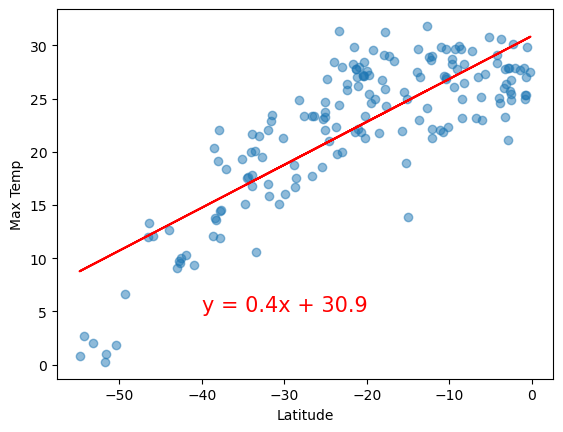

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.09181426091107937 , R value: 0.303008681247055


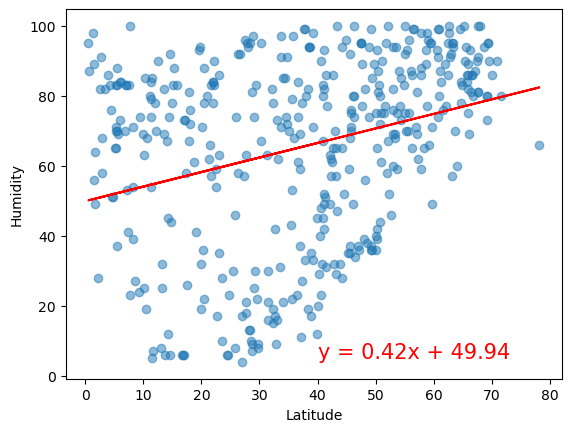

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()


R squared: 0.0007356696754844818 , R value: 0.027123231287670756


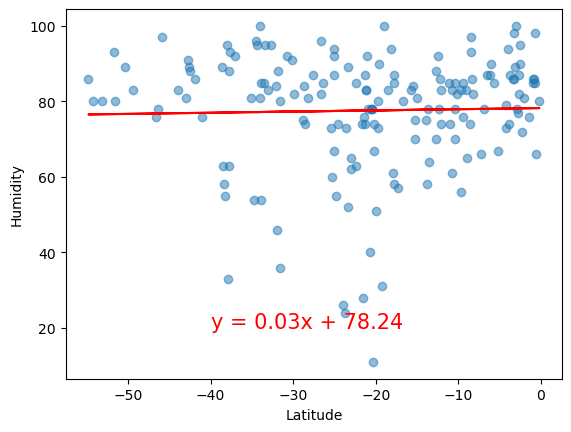

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.021016433921264076 , R value: 0.14497045878820994


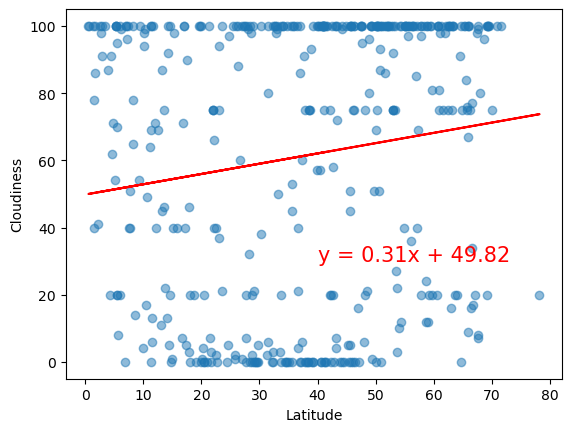

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()

R squared: 0.0398572927740892 , R value: 0.19964291315769062


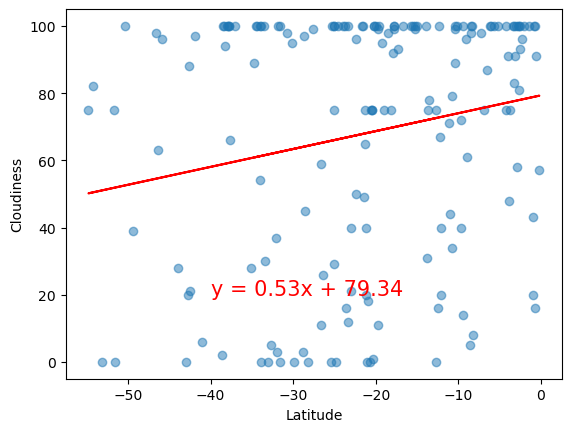

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.011214955114087202 , R value: 0.10590068514455986


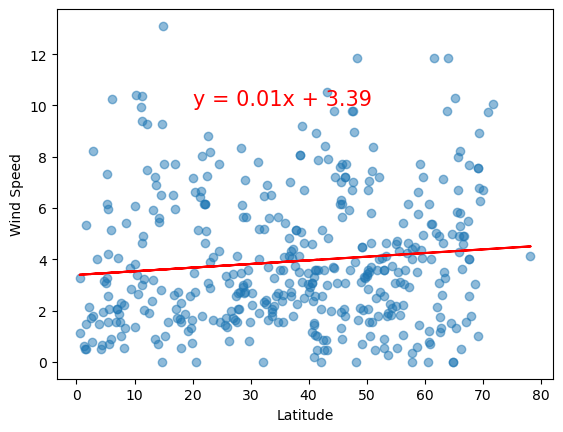

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()

R squared: 0.08182024088378807 , R value: -0.28604237602807747


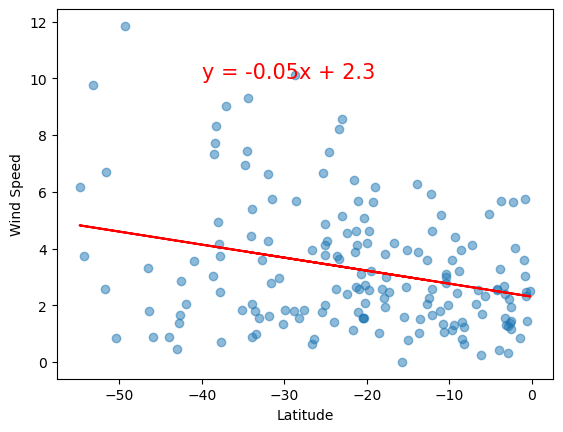

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x_values,y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2} , R value: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Max Tem and Latitude are corellated. Max Temp decreases as we move away from the equator (Lat : 0) 
### Weak or no corellation between Wind Speed, Humidity and Cloudiness with Latitude.